# Import Libraries

In [21]:
!pip install yfinance


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 3.9/3.9 MB 2.4 MB/s eta 0:00:00
  Attempting uninstall: lxml
    Found existing installation: lxml 4.6.4
    Uninstalling lxml-4.6.4:
      Successfully uninstalled lxml-4.6.4


In [22]:
import seaborn as sns
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

# data preperation

In [24]:
data = pd.read_csv('C:\\Users\\Dell\\OneDrive\\Desktop\\crypto_data1.csv')
data

,Date,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
0,2017-11-13 00:00:00+00:00,6559.490234,6.263250e+09,316.716003,1041889984,1.009350,7.678840e+08,1.686620,12238800
1,2017-11-14 00:00:00+00:00,6635.750000,3.197110e+09,337.631012,1069680000,1.006830,4.298580e+08,1.592580,7829600
2,2017-11-15 00:00:00+00:00,7315.540039,4.200880e+09,333.356995,722665984,1.003180,4.496710e+08,1.530450,7615500
3,2017-11-16 00:00:00+00:00,7871.689941,5.123810e+09,330.924011,797254016,1.002120,6.502790e+08,1.577920,8928640
4,2017-11-17 00:00:00+00:00,7708.990234,4.651670e+09,332.394012,621732992,1.001390,6.393980e+08,1.510360,8508840
...,...,...,...,...,...,...,...,...,...
1822,2022-11-09 00:00:00+00:00,15880.780270,1.029050e+11,1100.169800,38864492427,0.998600,1.439750e+11,266.853119,3191459132
1823,2022-11-10 00:00:00+00:00,17586.771480,8.320228e+10,1299.464600,28581002122,0.997835,1.148070e+11,304.080048,2461275687
1824,2022-11-11 00:00:00+00:00,17034.292970,5.587162e+10,1287.221069,20920539099,0.998218,7.493354e+10,289.820557,1625174426
1825,2022-11-12 00:00:00+00:00,16799.185550,2.971770e+10,1255.268311,10964962767,0.998616,4.029814e+10,282.341278,1189401392


In [25]:
btc = yf.Ticker('BTC-USD')
prices1 = btc.history(period='5y')
prices1.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

eth = yf.Ticker('ETH-USD')
prices2 = eth.history(period='5y')
prices2.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

usdt = yf.Ticker('USDT-USD')
prices3 = usdt.history(period='5y')
prices3.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

bnb = yf.Ticker('BNB-USD')
prices4 = bnb.history(period='5y')
prices4.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)
prices1

,Close,Volume
Date,,
2019-02-14 00:00:00+00:00,3616.880859,6271044418
2019-02-15 00:00:00+00:00,3620.810791,6091952231
2019-02-16 00:00:00+00:00,3629.787598,5934744052
2019-02-17 00:00:00+00:00,3673.836182,7039512503
2019-02-18 00:00:00+00:00,3915.714355,9908216640
...,...,...
2024-02-09 00:00:00+00:00,47147.199219,39316770844
2024-02-10 00:00:00+00:00,47771.277344,16398681570
2024-02-11 00:00:00+00:00,48293.917969,19315867136


In [26]:
p1 = prices1.join(prices2, lsuffix = ' (BTC)', rsuffix = ' (ETH)')
p2 = prices3.join(prices4, lsuffix = ' (USDT)', rsuffix = ' (BNB)')
data = p1.join(p2, lsuffix = '_', rsuffix = '_')
data

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2019-02-14 00:00:00+00:00,3616.880859,6271044418,121.390205,3331701628,1.006482,4761618448,8.782048,72389547
2019-02-15 00:00:00+00:00,3620.810791,6091952231,122.100388,3021741615,1.003441,5016161093,9.273832,83961438
2019-02-16 00:00:00+00:00,3629.787598,5934744052,123.260216,2905833287,1.003264,4506743621,9.129251,65705040
2019-02-17 00:00:00+00:00,3673.836182,7039512503,133.598877,4236081130,1.000956,5746888553,9.216046,66977126
2019-02-18 00:00:00+00:00,3915.714355,9908216640,146.098373,5387525773,1.005453,9082574152,9.634436,79003060
...,...,...,...,...,...,...,...,...
2024-02-09 00:00:00+00:00,47147.199219,39316770844,2487.515625,13634203177,1.000490,55541686302,323.842285,1094700959
2024-02-10 00:00:00+00:00,47771.277344,16398681570,2501.228271,6474444159,1.000318,28746535798,323.133881,737748174
2024-02-11 00:00:00+00:00,48293.917969,19315867136,2507.570557,7347245813,1.000279,31433121648,320.787537,706320478


In [12]:
data.head()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2019-01-29 00:00:00+00:00,3448.116943,5897159493,105.598213,2900418606,1.009438,4206195777,6.181670,49291811
2019-01-30 00:00:00+00:00,3486.181641,5955112627,108.907539,2874370355,1.007188,4249354160,6.174529,41310644
2019-01-31 00:00:00+00:00,3457.792725,5831198271,107.061012,2828796031,1.006490,4110696174,6.268436,52240451
2019-02-01 00:00:00+00:00,3487.945312,5422926707,107.609787,2541271519,1.006309,3949396927,6.562617,56050947
2019-02-02 00:00:00+00:00,3521.060791,5071623601,110.430260,2385157838,1.002700,3806913471,6.891695,56627089


In [13]:
data.tail()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2024-01-25 00:00:00+00:00,39933.808594,18491782013,2217.710205,9302247037,0.999717,33716145309,291.919281,1086918042
2024-01-26 00:00:00+00:00,41816.871094,25598119893,2267.199707,9975117607,0.999986,42091434921,302.317993,964268733
2024-01-27 00:00:00+00:00,42120.054688,11422941934,2267.885986,5144367230,1.000047,23232564659,305.824829,691653061
2024-01-28 00:00:00+00:00,42035.593750,16858971687,2257.208740,7296214994,1.000001,29379055847,304.975616,782354766
2024-01-29 00:00:00+00:00,43100.015625,20521603072,2311.430420,8897118208,1.000172,35463049216,310.025208,818258688


In [15]:
data.shape

(1827, 8)

In [32]:
original = data.iloc[-1, :]

data = data.iloc[:-1,:]

6271044418

In [ ]:
data

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2018-01-19,11607.400391,10740400128,1039.099976,4084450048,1.004540,2876989952,14.940600,139882000
2018-01-20,12899.200195,11801700352,1155.150024,3975190016,1.001110,2942779904,16.190300,156744992
2018-01-21,11600.099609,9935179776,1049.579956,3378089984,0.999861,3302010112,14.068300,141562000
2018-01-22,10931.400391,10537400320,1003.260010,3810099968,1.005040,3274899968,13.014600,138026000
2018-01-23,10868.400391,9660609536,986.229004,3556699904,1.005050,3126830080,13.093500,91706200
...,...,...,...,...,...,...,...,...
2023-01-14,20976.298828,38967784639,1550.706909,15444626014,1.000157,53708266585,305.241119,1087358891
2023-01-15,20880.798828,19298407543,1552.479492,6774614499,1.000374,30028224816,302.070648,562889882
2023-01-16,21169.632812,26792494050,1576.833496,8454485431,1.000126,35957366329,298.999237,602126315


# Exploratory Data Analysis

### Statistical Analysis

In [ ]:
data.shape 

(1826, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2018-01-19 to 2023-01-18
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close (BTC)    1826 non-null   float64
 1   Volume (BTC)   1826 non-null   int64  
 2   Close (ETH)    1826 non-null   float64
 3   Volume (ETH)   1826 non-null   int64  
 4   Close (USDT)   1826 non-null   float64
 5   Volume (USDT)  1826 non-null   int64  
 6   Close (BNB)    1826 non-null   float64
 7   Volume (BNB)   1826 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 128.4 KB


In [ ]:
data.isna().sum()

Close (BTC)      0
Volume (BTC)     0
Close (ETH)      0
Volume (ETH)     0
Close (USDT)     0
Volume (USDT)    0
Close (BNB)      0
Volume (BNB)     0
dtype: int64

In [ ]:
data.describe()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
count,1826.000000,1.826000e+03,1826.000000,1.826000e+03,1826.000000,1.826000e+03,1826.000000,1.826000e+03
mean,20378.000842,2.663421e+10,1149.746681,1.321920e+10,1.001243,4.251411e+10,153.542685,9.953857e+08
std,16976.847941,1.982647e+10,1200.414467,1.078178e+10,0.005002,3.782408e+10,183.753022,1.445697e+09
min,3236.761719,2.923670e+09,84.308296,9.484880e+08,0.966644,1.090880e+09,4.528650,9.284000e+03
25%,7682.069092,1.271181e+10,208.920326,5.130368e+09,0.999950,1.270769e+10,14.971465,1.576970e+08
50%,10960.592285,2.437190e+10,518.846069,1.108203e+10,1.000414,3.727348e+10,27.911153,3.907068e+08
75%,33740.259766,3.583049e+10,1803.337372,1.836379e+10,1.002119,6.100956e+10,297.813110,1.431768e+09
max,67566.828125,3.509679e+11,4812.087402,8.448291e+10,1.053585,2.790675e+11,675.684082,1.798295e+10


### Visualization Analysis

<AxesSubplot:xlabel='Date'>

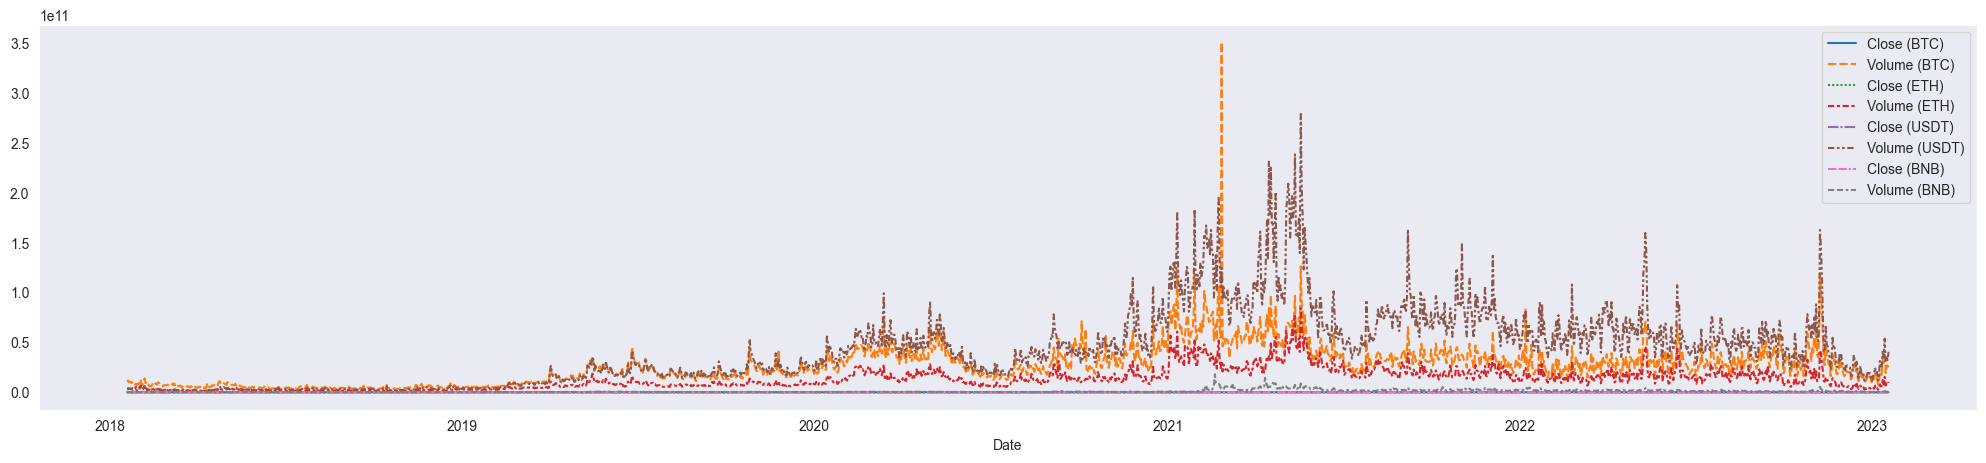

In [ ]:
plt.figure(figsize = (25, 5))
sns.set_style('dark')
sns.lineplot(data=data)

Text(0.5, 1.0, 'Adjacent Close Price')

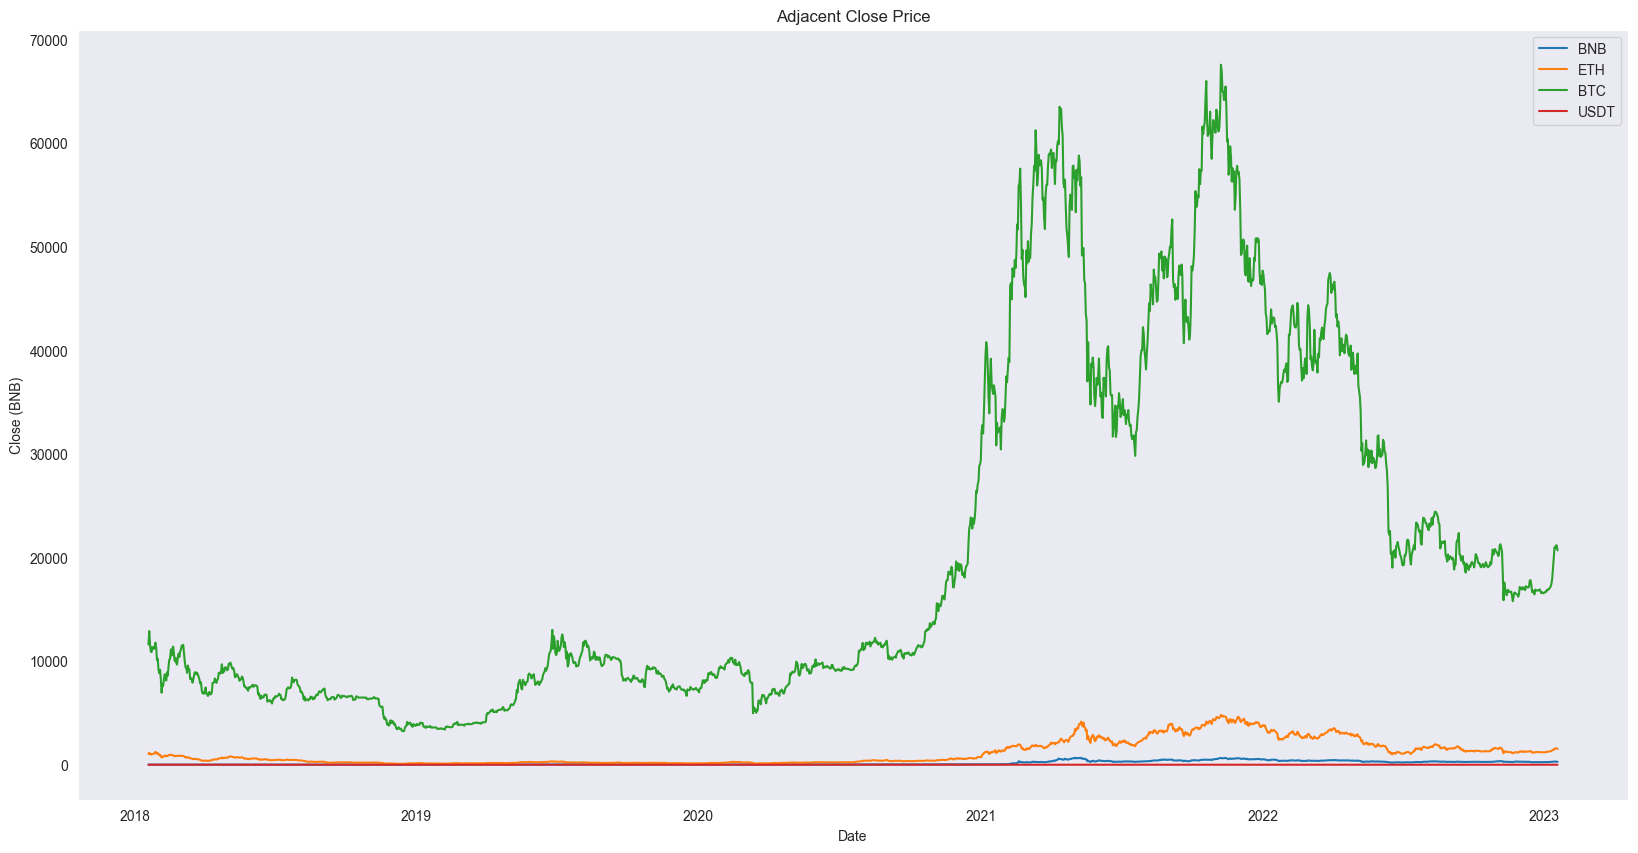

In [ ]:
plt.figure(figsize = (20, 10))
sns.set_style('dark')
sns.lineplot(data = data['Close (BNB)'], label = 'BNB')
sns.lineplot(data = data['Close (ETH)'], label = 'ETH')
sns.lineplot(data = data['Close (BTC)'], label = 'BTC')
sns.lineplot(data = data['Close (USDT)'], label = 'USDT')
plt.title('Adjacent Close Price')

Text(0.5, 1.0, 'Volume')

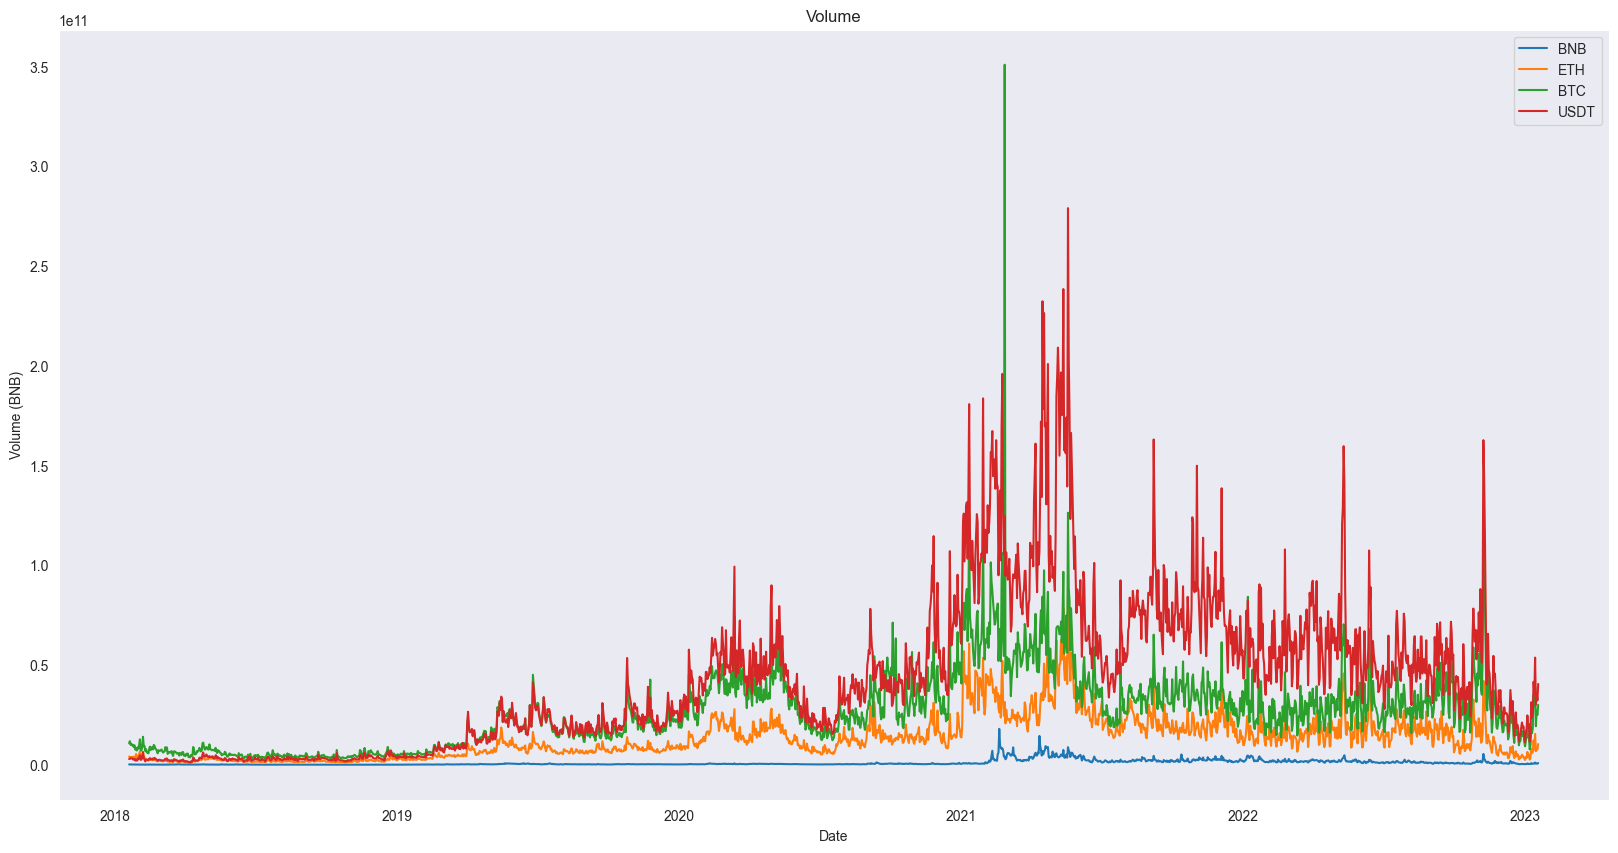

In [ ]:
plt.figure(figsize = (20, 10))
sns.set_style('dark')
sns.lineplot(data = data['Volume (BNB)'], label = 'BNB')
sns.lineplot(data = data['Volume (ETH)'], label = 'ETH')
sns.lineplot(data = data['Volume (BTC)'], label = 'BTC')
sns.lineplot(data = data['Volume (USDT)'], label = 'USDT')
plt.title('Volume')

In [ ]:
data.loc[:,'Close (BTC)'].values

array([11607.40039062, 12899.20019531, 11600.09960938, ...,
       21169.6328125 , 21161.51953125, 20688.78125   ])

array([[<AxesSubplot:title={'center':'Close (BTC)'}>,
        <AxesSubplot:title={'center':'Volume (BTC)'}>,
        <AxesSubplot:title={'center':'Close (ETH)'}>,
        <AxesSubplot:title={'center':'Volume (ETH)'}>],
       [<AxesSubplot:title={'center':'Close (USDT)'}>,
        <AxesSubplot:title={'center':'Volume (USDT)'}>,
        <AxesSubplot:title={'center':'Close (BNB)'}>,
        <AxesSubplot:title={'center':'Volume (BNB)'}>]], dtype=object)

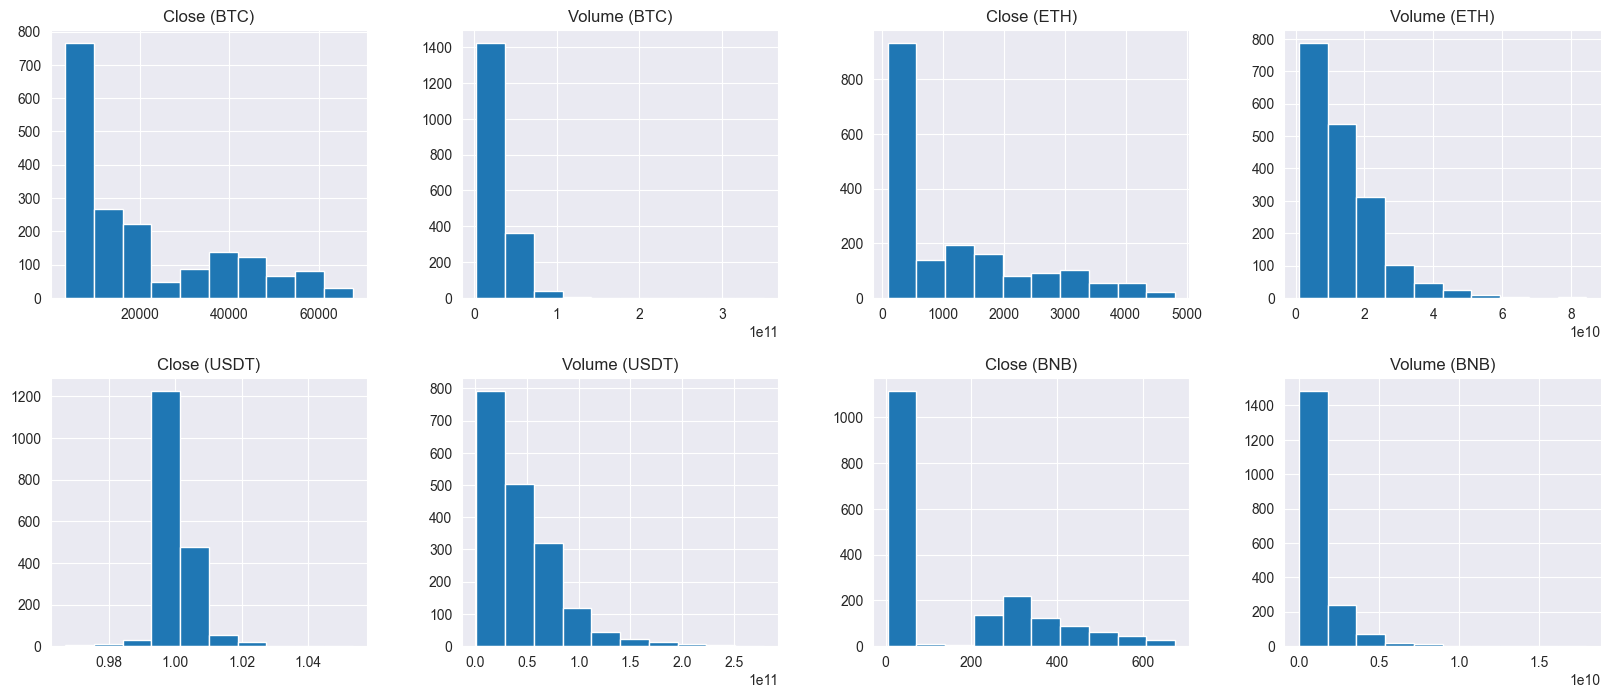

In [ ]:
data.hist(figsize=(20, 8), layout=(2, 4))

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

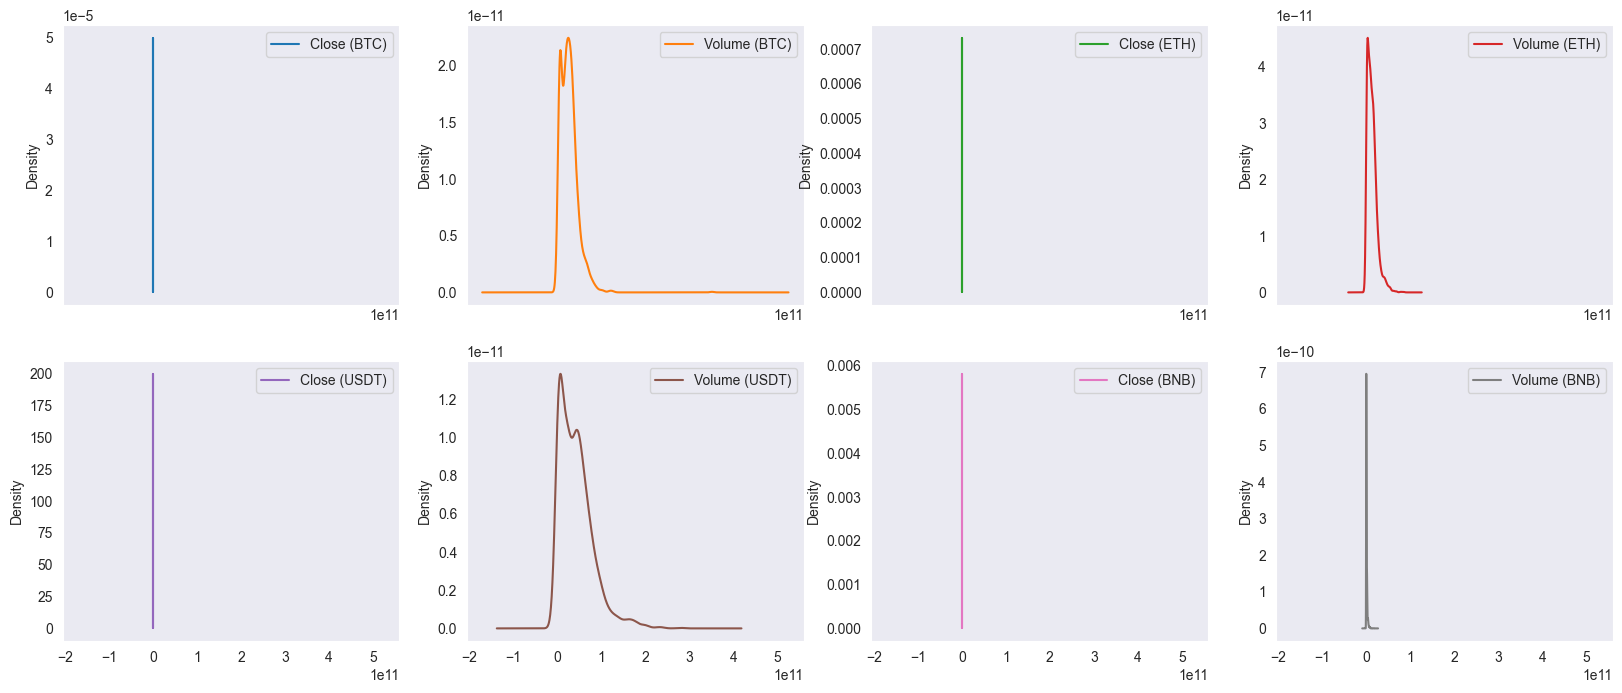

In [ ]:
data.plot(kind = "kde", subplots = True, layout = (2, 4), figsize = (20, 8))

### checking for correlation

In [ ]:
data.corr()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Close (BTC),1.000000,0.552077,0.923324,0.660868,-0.151827,0.765669,0.890221,0.761898
Volume (BTC),0.552077,1.000000,0.371440,0.853848,-0.076165,0.867537,0.388656,0.593173
Close (ETH),0.923324,0.371440,1.000000,0.532668,-0.156912,0.621806,0.953233,0.646100
Volume (ETH),0.660868,0.853848,0.532668,1.000000,-0.080671,0.945445,0.530882,0.691762
Close (USDT),-0.151827,-0.076165,-0.156912,-0.080671,1.000000,-0.097373,-0.148688,-0.095599
Volume (USDT),0.765669,0.867537,0.621806,0.945445,-0.097373,1.000000,0.627067,0.770328
Close (BNB),0.890221,0.388656,0.953233,0.530882,-0.148688,0.627067,1.000000,0.703099
Volume (BNB),0.761898,0.593173,0.646100,0.691762,-0.095599,0.770328,0.703099,1.000000


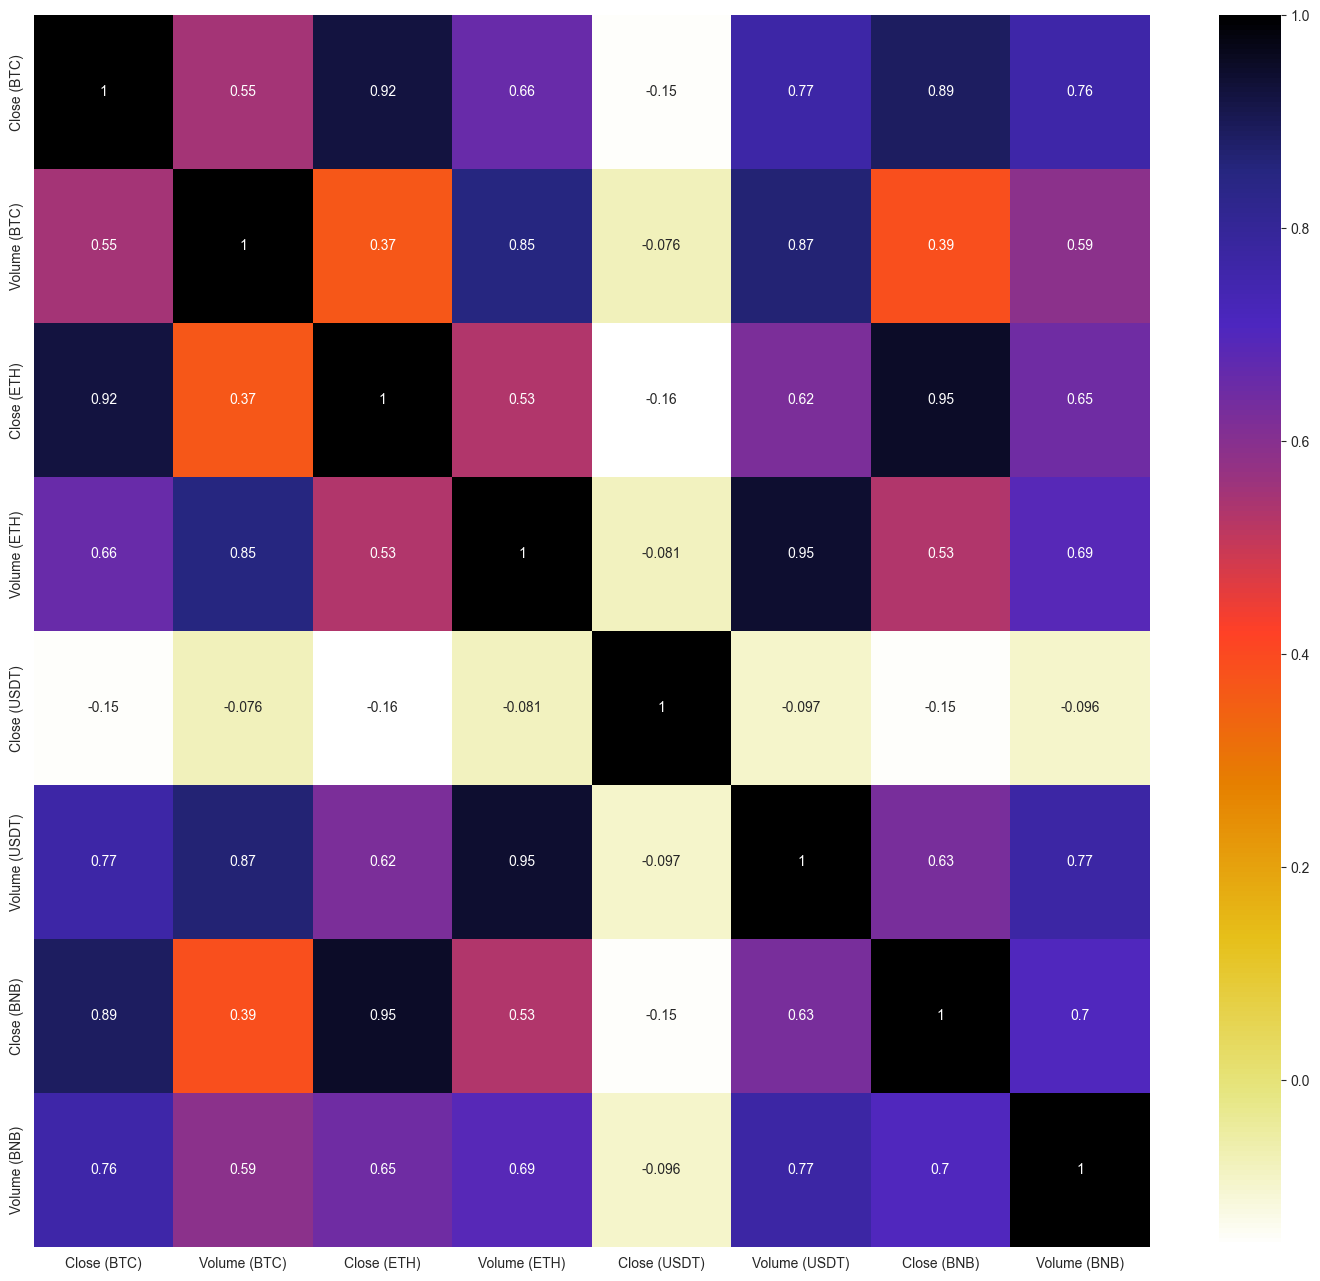

In [ ]:
plt.figure(figsize=(18,16))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.CMRmap_r);

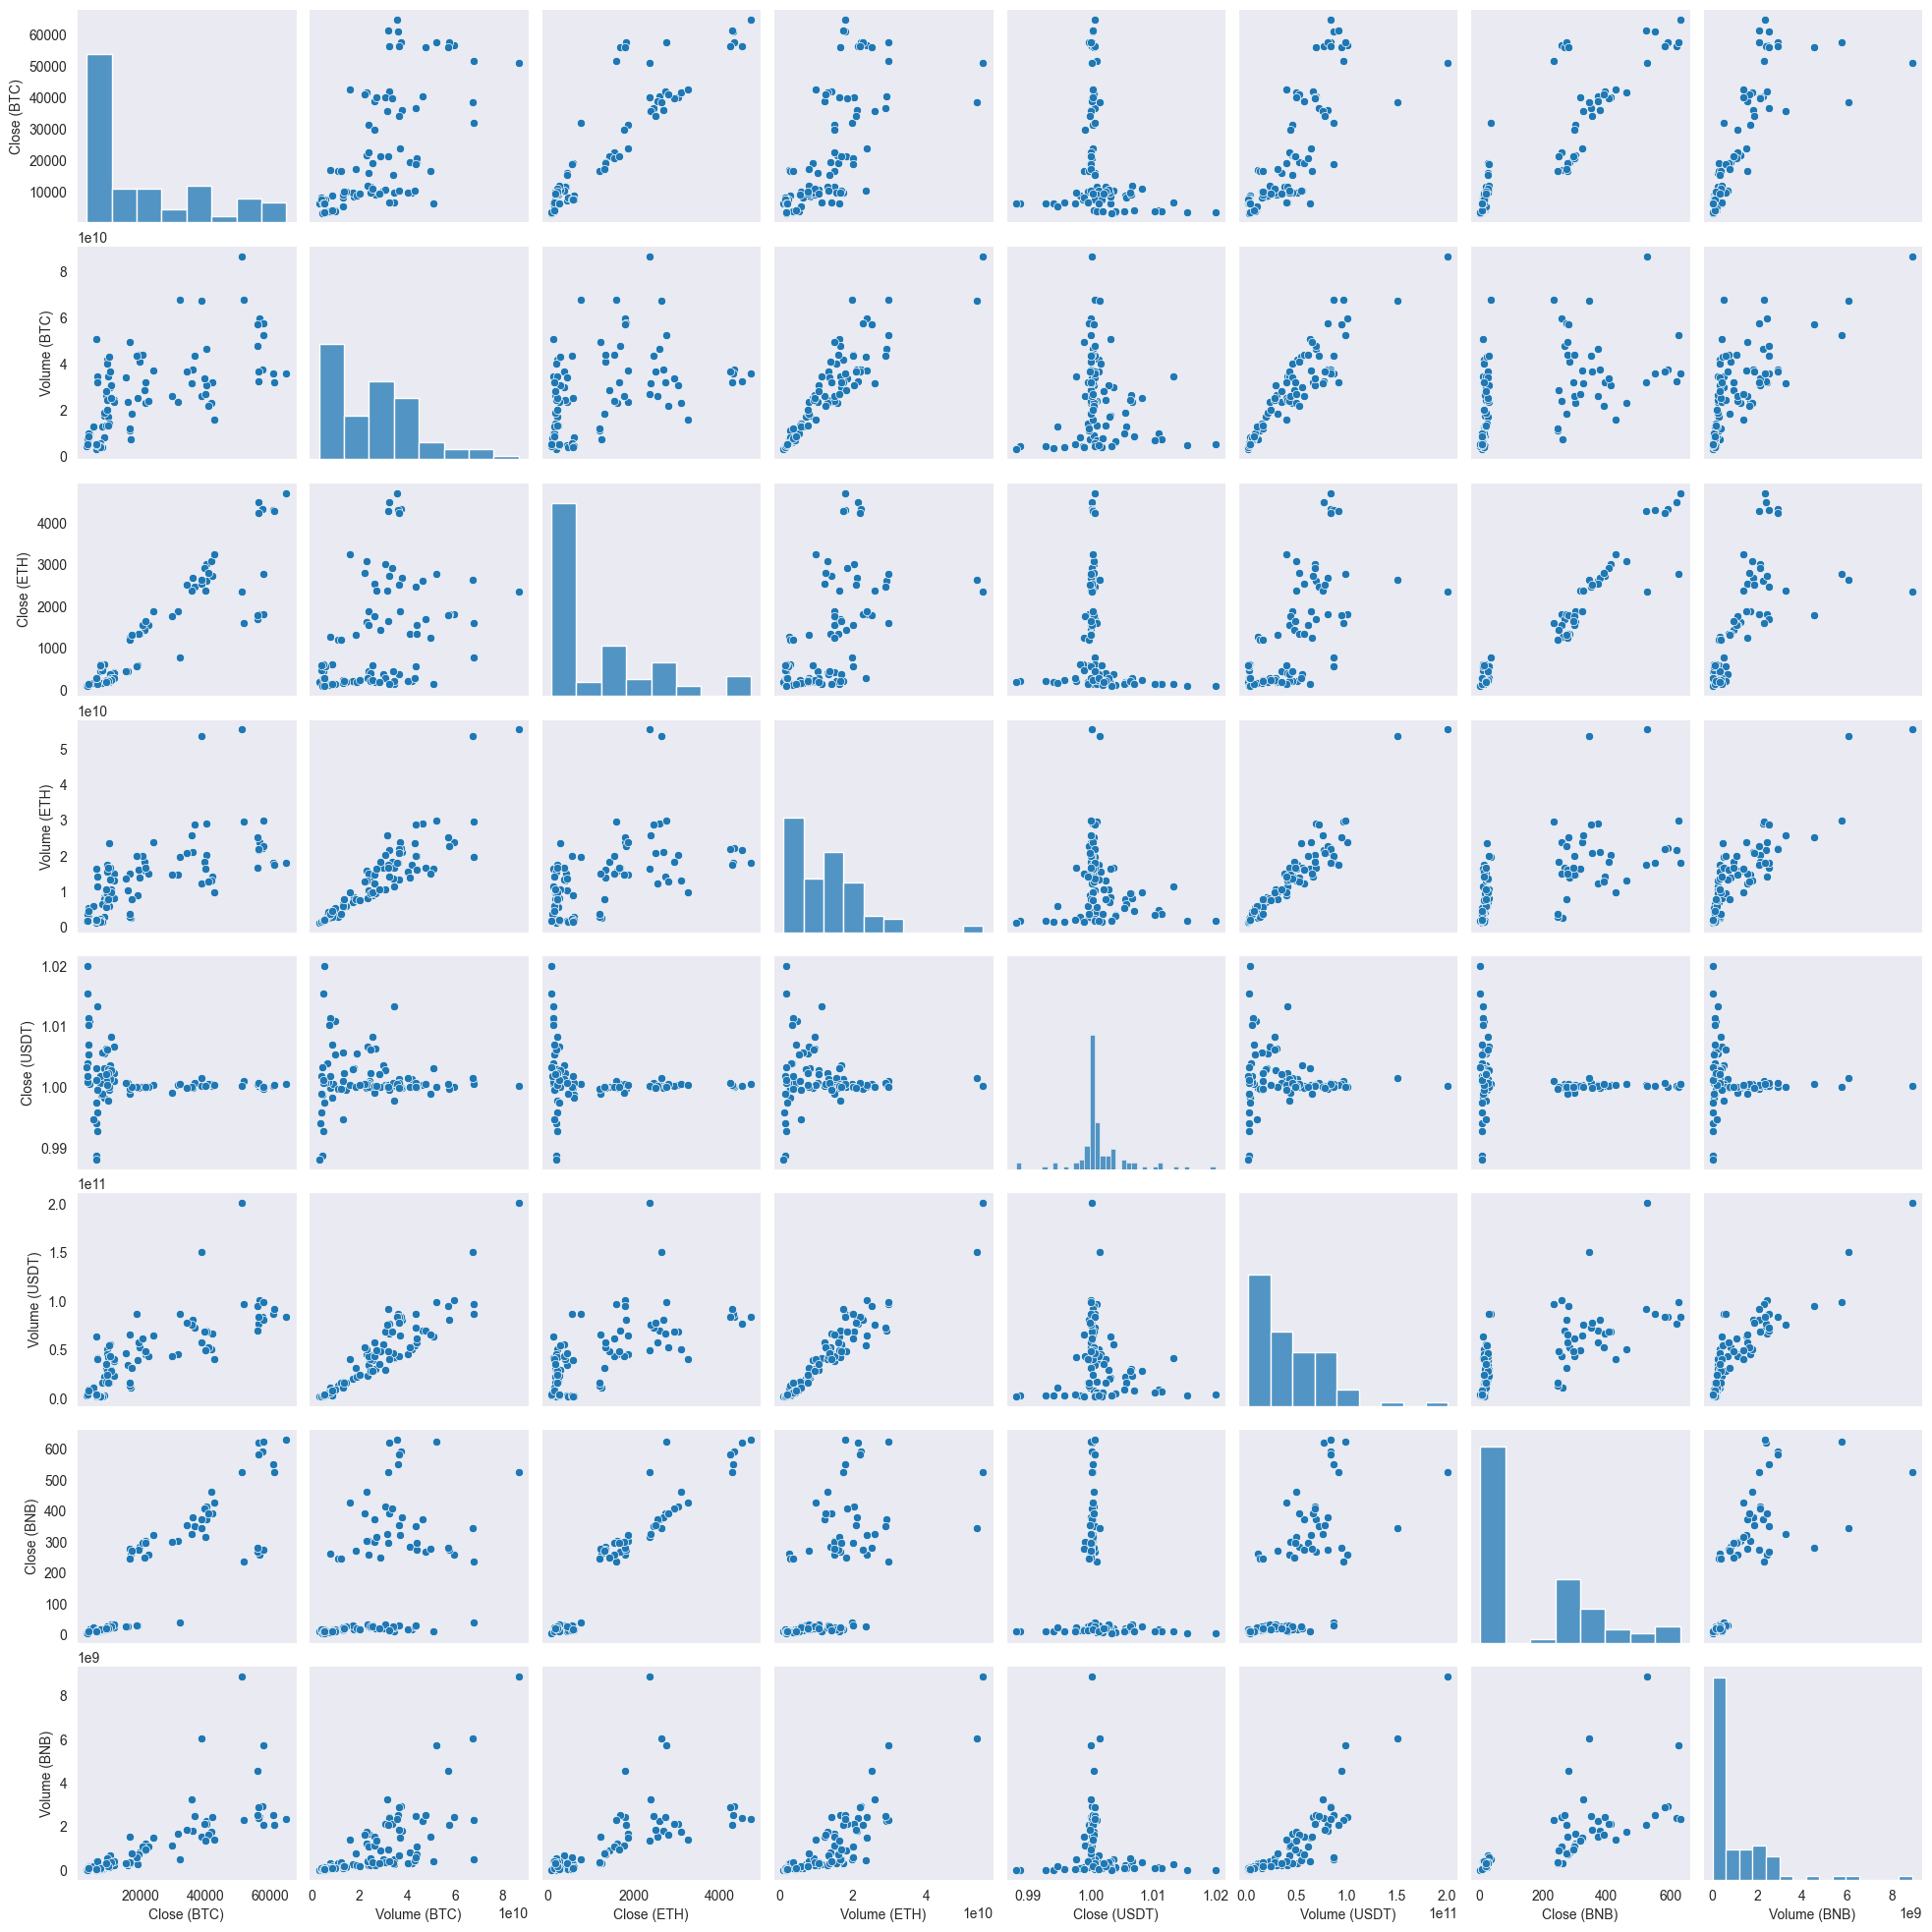

In [ ]:
sns.pairplot(data.sample(n=100));

# data Pre-processing

In [ ]:
X = data.drop(columns = ['Close (BTC)'], axis = 1)
Y = data.loc[:, 'Close (BTC)']

In [ ]:
X.head()

,Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,
2018-01-19,10740400128,1039.099976,4084450048,1.004540,2876989952,14.9406,139882000
2018-01-20,11801700352,1155.150024,3975190016,1.001110,2942779904,16.1903,156744992
2018-01-21,9935179776,1049.579956,3378089984,0.999861,3302010112,14.0683,141562000
2018-01-22,10537400320,1003.260010,3810099968,1.005040,3274899968,13.0146,138026000
2018-01-23,9660609536,986.229004,3556699904,1.005050,3126830080,13.0935,91706200


In [ ]:
Y.head()

Date
2018-01-19    11607.400391
2018-01-20    12899.200195
2018-01-21    11600.099609
2018-01-22    10931.400391
2018-01-23    10868.400391
Name: Close (BTC), dtype: float64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [ ]:
from sklearn.feature_selection import SelectKBest

fs = SelectKBest(k=4)
X_train = fs.fit_transform(X_train, Y_train)
X_test = fs.transform(X_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Feature Selection

# BaseLine Modeling




In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
neigh = KNeighborsRegressor(n_neighbors=4)
neigh.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=4)

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
dt = tree.DecisionTreeRegressor()
dt.fit(X_train, Y_train)

DecisionTreeRegressor()

In [ ]:
est = GradientBoostingRegressor()
est.fit(X_train, Y_train)

GradientBoostingRegressor()

# Evaluation

In [ ]:
Y_pred_neigh = neigh.predict(X_test)
r2neigh = metrics.r2_score(Y_test, Y_pred_neigh)

Y_pred_rf = rf.predict(X_test)
r2rf = metrics.r2_score(Y_test, Y_pred_rf)

Y_pred_dt = dt.predict(X_test)
r2dt = metrics.r2_score(Y_test, Y_pred_dt)

Y_pred_est = est.predict(X_test)
r2est = metrics.r2_score(Y_test, Y_pred_est)

In [ ]:
print("*"*10, "Accuracy", "*"*10)

print("-"*30)
print("K nearest neighbors: ", r2neigh)
print("-"*30)


print("-"*30)
print("random forest: ", r2rf)
print("-"*30)


print("-"*30)
print("decision tree: ", r2dt)
print("-"*30)


print("-"*30)
print("gradient boosting: ", r2est)
print("-"*30)

********** Accuracy **********
------------------------------
K nearest neighbors:  0.9825462984311351
------------------------------
------------------------------
random forest:  0.9821641330725069
------------------------------
------------------------------
decision tree:  0.971602644614464
------------------------------
------------------------------
gradient boosting:  0.9685791390085357
------------------------------


result: random forest and KNN gives same result which are accurate and works well with our dataset!

# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 100)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 200, num = 20)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 3, verbose=0, random_state=42, n_jobs = -1)
rf_random.fit(X_train, Y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110, 120,
                                                      130, 140, 150, 160, 170,
                                                      180, 190, 200, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 180, 190,
                                                         200, 210, 220, 230,
                                                         240, 250, 260, 270,
                                                         280, 290, 300, ...]},
                   random_state=42)

In [ ]:
rf_random.best_params_

{'n_estimators': 840,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 90,
 'bootstrap': True}

# Model Evaluation (performance analysis)

In [ ]:
rf = RandomForestRegressor(**rf_random.best_params_)
rf.fit(X_train, Y_train)

Y_pred_rf = rf.predict(X_test)
r2rf = metrics.r2_score(Y_test, Y_pred_rf)

print("-"*30)
print("Accuracy: ", r2rf)
print("-"*30)

------------------------------
Accuracy:  0.9825422671194558
------------------------------


# Machine Learning Explainability

In [ ]:
!pip install shap

In [ ]:
import shap

In [ ]:
shap.initjs()

In [ ]:
shap_values = shap.TreeExplainer(rf).shap_values(X_test)

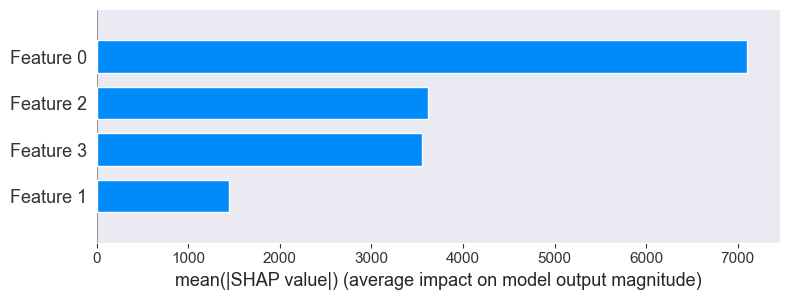

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

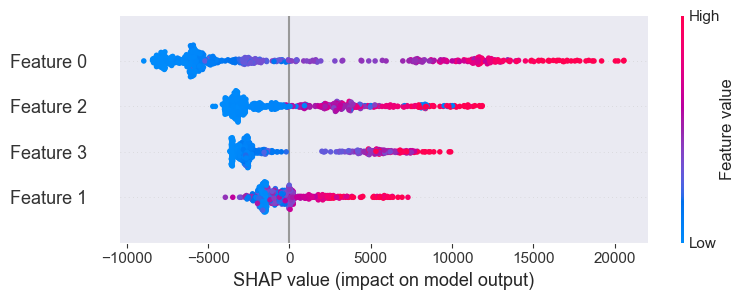

In [ ]:
shap.summary_plot(shap_values, X_test)

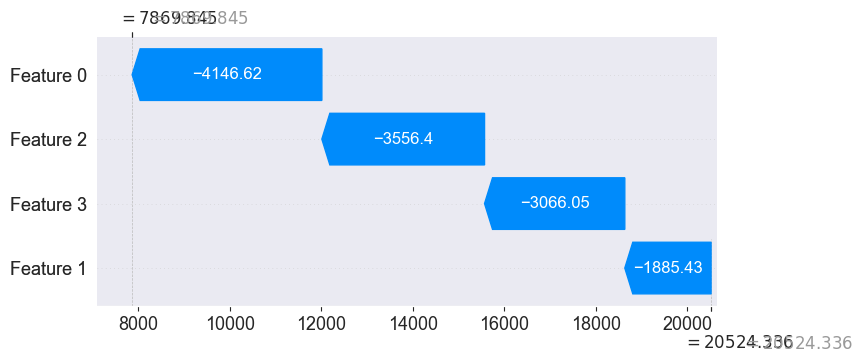

[0.11104467 0.00613429 0.01649491 0.00564228]


In [ ]:
row = 111
shap.plots._waterfall.waterfall_legacy(shap.TreeExplainer(rf).expected_value[0], 
                                       shap_values[row],
                                      )

print(X_test[111])

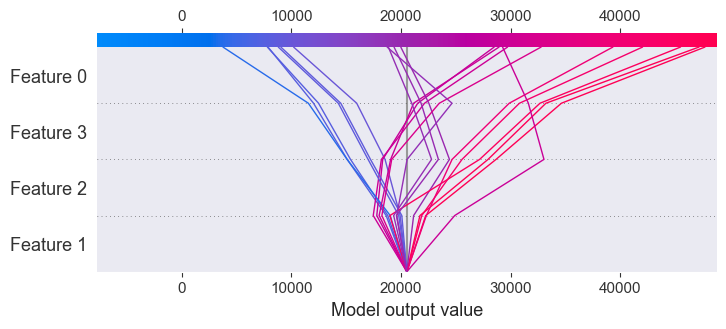

In [ ]:
shap.decision_plot(shap.TreeExplainer(rf).expected_value[0], 
                   shap_values[110:130])

In [ ]:
shap.force_plot(shap.TreeExplainer(rf).expected_value, shap_values[0:257], X_test[0:257])

# Prediction

In [ ]:
original

Close (BTC)      2.070085e+04
Volume (BTC)     2.997990e+10
Close (ETH)      1.516719e+03
Volume (ETH)     1.011652e+10
Close (USDT)     9.999939e-01
Volume (USDT)    3.884234e+10
Close (BNB)      2.876900e+02
Volume (BNB)     8.342216e+08
Name: 2023-01-19 00:00:00, dtype: float64

In [ ]:
Y_pred_rf = rf.predict(X_test)
Y_pred_rf

array([16819.15958659, 22922.56733166,  7346.47284662, 26300.41990095,
       18755.60401553, 34975.26976144,  5653.66236136,  9059.76177397,
        8507.61204369, 20544.56186291,  6569.85158575, 19469.85879836,
       16773.62543015,  7252.1300168 ,  3940.80856381, 57001.10772414,
        6966.31004871, 59215.06314639,  9300.64985061, 19234.25006975,
        9386.72073277,  8841.70594134,  8558.03403553, 58761.20532924,
       19495.93761161, 17743.33073382, 30418.03840216, 53199.68386347,
        3651.62546561,  8097.19901239,  6815.43257999,  8308.99188814,
       35237.77446754, 10233.7783424 , 20731.74911644, 39553.93178478,
        6402.21583949,  7350.30618315,  5664.51036261,  6541.57099028,
        3804.63174758,  3704.22614194, 42655.20380394,  8814.83790923,
       20095.69860259, 40146.46175363, 10872.94382092, 31945.60394578,
        8778.35955752, 47813.93917178, 57804.19102493, 33384.10164388,
        7041.4975894 , 10187.58652169,  9567.08408668,  6815.4508853 ,
      

In [ ]:
Y_pred_neigh = neigh.predict(X_test)
Y_pred_neigh

array([16736.26513672, 23369.65917969,  7317.67297363, 22252.07910156,
       19225.85693359, 51375.890625  ,  5809.35510254,  9002.77990723,
        9294.29736328, 20639.19873047,  6574.11499023, 19286.52685547,
       16736.26513672,  7340.38525391,  4062.3347168 , 56068.55175781,
        6840.79992676, 58577.09277344,  9472.91601562, 19240.91748047,
        9442.26342773,  8775.4510498 ,  9047.4777832 , 61500.88964844,
       19286.52685547, 18012.76708984, 26802.59912109, 55956.7890625 ,
        3725.76531982,  8163.79699707,  6483.66992188,  8173.65319824,
       34664.22167969, 10267.20141602, 21027.00976562, 37808.60449219,
        6384.17993164,  7262.30493164,  5632.89746094,  6456.74499512,
        3874.5692749 ,  3651.9664917 , 42135.73535156,  8496.65930176,
       19834.11523438, 39185.73535156, 10436.70263672, 33101.        ,
        9257.07116699, 48575.21289062, 62346.92480469, 34140.90429688,
        7690.97302246, 10160.02758789,  9449.38623047,  6230.04248047,
      

In [ ]:
Y_pred_dt = dt.predict(X_test)
Y_pred_dt

array([16841.98632812, 21398.90820312,  7278.11962891, 28627.57421875,
       19141.484375  , 20818.4765625 ,  5623.54003906,  7688.07714844,
        9395.00976562, 20553.27148438,  6489.18994141, 19426.72070312,
       16642.34179688,  7191.15869141,  3896.375     , 61452.23046875,
        7321.04003906, 57806.56640625,  9243.61425781, 18890.7890625 ,
        9538.02441406,  9199.58496094,  7881.84667969, 61452.23046875,
       19297.63867188, 17206.4375    , 29799.08007812, 49004.25390625,
        3576.0324707 ,  7881.84667969,  7567.14990234,  7807.05859375,
       34316.38671875, 10916.05371094, 21731.1171875 , 38705.98046875,
        6285.99023438,  6173.22998047,  5795.70849609,  6519.66992188,
        4014.18261719,  3601.01367188, 42287.6640625 ,  9256.1484375 ,
       20095.85742188, 36894.40625   , 11259.40039062, 35566.65625   ,
        8805.77832031, 46942.21875   , 60692.265625  , 29432.2265625 ,
        6971.09179688, 10763.23242188,  9905.16699219,  6359.64013672,
      

In [ ]:
Y_pred_est = est.predict(X_test)
Y_pred_est

array([17324.91600852, 22676.68014335,  6854.03088779, 25456.45183831,
       18642.7336731 , 28391.88797705,  5950.45345555,  9685.42846613,
        9130.57285653, 19974.45931827,  6520.65601617, 18208.56688564,
       17324.91600852,  6913.59901286,  3947.73753943, 58481.77937033,
        7348.19602532, 56940.98215728,  8666.15658194, 19111.08813618,
        8666.15658194,  9256.77682052,  9496.3161614 , 57524.0086223 ,
       18208.56688564, 18239.58154615, 35380.69272004, 51106.64219513,
        3908.1650317 ,  9685.42846613,  7197.83870735,  8746.73916219,
       37451.55509862, 10114.51258586, 19574.25914517, 46646.10931874,
        6481.51961822,  7348.19602532,  6028.21178387,  6443.91186539,
        3947.73753943,  3908.1650317 , 43579.06092474,  8965.35105363,
       19185.74823751, 43885.05083386, 10326.58265342, 32379.68090175,
        9849.71461198, 48089.14676884, 58476.06201835, 32942.492848  ,
        6926.97349026, 10301.1703996 ,  8637.75927676,  7197.83870735,
      